In [1]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from scipy.stats import linregress
from citipy import citipy

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "a789fe0ca064c2b30482159ecc6894e4"
units = "imperial"

city_names = []
city_longitude = []
city_latitude = []
city_temperature = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []

for i in range(2000):
    random_longitude = random.uniform(-90, 90)
    random_latitude = random.uniform(-180, 180)
    city_search = city_name = citipy.nearest_city(random_longitude, random_latitude).city_name
    
    query_url = f"{url}q={city_name}&units={units}&appid={api_key}"
    city_response = requests.get(query_url)
    citydata_json = city_response.json()
    
    try:
        city_names.append(city_name)
        city_temperature.append(citydata_json["main"]["temp"])
        city_humidity.append(citydata_json["main"]["humidity"])
        city_cloudiness.append(citydata_json["clouds"]["all"])
        city_windspeed.append(citydata_json["wind"]["speed"])
        city_longitude.append(citydata_json["coord"]["lon"])
        city_latitude.append(citydata_json["coord"]["lat"])
        city_country.append(citydata_json["sys"]["country"])
        
#         print(city_name + " found!")
    
    except:
        city_temperature.append(np.nan)
        city_humidity.append(np.nan)
        city_cloudiness.append(np.nan)
        city_windspeed.append(np.nan)
        city_longitude.append(np.nan)
        city_latitude.append(np.nan)
        city_country.append(np.nan)
#         print(city_name +" not found")
    pass
    

In [3]:
#create dataframe
weather_cities_df = pd.DataFrame({
    "City" : city_names,
    "Country":city_country,
    "Temperature": city_temperature,
    "Humidity %": city_humidity,
    "Cloudiness %": city_cloudiness,
    "Windspeed(mph)":city_windspeed,
    "Longitude": city_longitude,
    "Latitude": city_latitude
})

weather_cities_df = weather_cities_df.dropna()

weather_cities_df = weather_cities_df.drop_duplicates(subset = ["City"])

weather_cities_df.to_csv("./output_data/weather_data.csv")

weather_cities_df

,City,Country,Temperature,Humidity %,Cloudiness %,Windspeed(mph),Longitude,Latitude
1,nisko,PL,54.00,98.0,100.0,3.00,22.14,50.52
2,mbanza-ngungu,CD,85.59,43.0,33.0,7.07,14.87,-5.25
3,castro,BR,90.91,28.0,0.0,10.27,-50.01,-24.79
4,ostrovnoy,RU,47.46,88.0,22.0,12.97,39.51,68.05
5,alofi,NU,75.20,94.0,4.0,5.82,-169.92,-19.06
...,...,...,...,...,...,...,...,...
1975,moranbah,AU,61.84,83.0,0.0,13.11,148.05,-22.00
1979,coulommiers,FR,63.68,82.0,99.0,5.59,3.08,48.81
1990,latung,PH,83.41,71.0,1.0,4.90,120.88,5.50
1991,svetlaya,RU,51.64,61.0,81.0,7.90,138.33,46.54


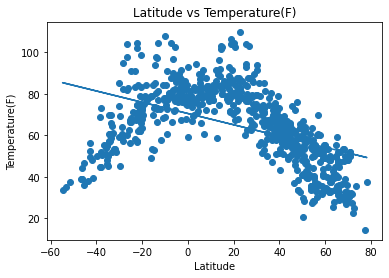

In [32]:
x_latitude = np.asarray(weather_cities_df["Latitude"])
y_temperature = np.asarray(weather_cities_df["Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temperature)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_temperature)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title("Latitude vs Temperature(F)")
plt.savefig("./output_data/output_graphs/general_lat_vs_temp.png")
plt.show()

#ANALYZING THE RELATIONSHIP BETWEEN LATITUDE AND TEMPERATURE
#THERE APPEARS TO BE A NEGATIVE RELATIONSHIP BUT IT CANNOT BE 
#DETERMINED BY THE LINEAR REGRESSION BECAUSE THE TEMPERATURE 
#INCREASES AS THE LATITUDE APPROACHES 0 BUT DECREASES AS IT 
#GETS FUTHER AWAY FROM THE LATITUDE = 0

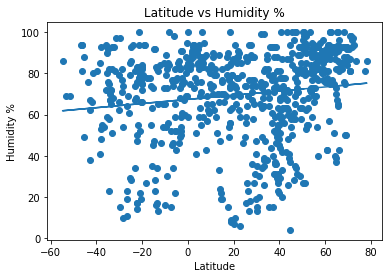

In [33]:
x_latitude = np.asarray(weather_cities_df["Latitude"])
y_humidity = np.asarray(weather_cities_df["Humidity %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_humidity)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_humidity)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Latitude vs Humidity %")
plt.savefig("./output_data/output_graphs/general_lat_vs_humidity.png")
plt.show()

#THERE APPEARS TO BE NO RELATIONSHIP BETWEEN THE LATITUDE AND THE HUMIDITY OF A CITY
#SINCE THERE ARE HIGH AND LOW HUMIDITIES OVER A WIDE RANGE OF LATITUDES

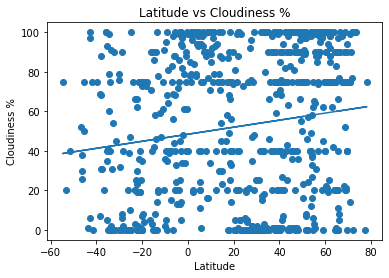

In [34]:
x_latitude = np.asarray(weather_cities_df["Latitude"])
y_cloudiness = np.asarray(weather_cities_df["Cloudiness %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_cloudiness)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_cloudiness)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Latitude vs Cloudiness %")
plt.savefig("./output_data/output_graphs/general_lat_vs_cloudiness.png")
plt.show()


#THERE APPEARS TO BE NO RELATIONSHIP BETWEEN THE LATITUDE AND THE CLOUDINESS OF A CITY
#SINCE THERE ARE HIGH AND LOW HUMIDITIES OVER A WIDE RANGE OF LATITUDES

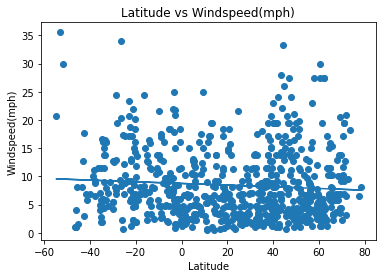

In [35]:
x_latitude = np.asarray(weather_cities_df["Latitude"])
y_windspeed = np.asarray(weather_cities_df["Windspeed(mph)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_windspeed)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_windspeed)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed(mph)')
plt.title("Latitude vs Windspeed(mph)")
plt.savefig("./output_data/output_graphs/general_lat_vs_windspeed.png")
plt.show()
#THERE APPEARS TO BE NO RELATIONSHIP BETWEEN THE LATITUDE AND THE WINDPSEED OF A CITY
#BASED ON THE LINEAR REGRESSION MODEL SINCE THERE ARE HIGH AND LOW HUMIDITIES OVER A WIDE RANGE OF LATITUDES

In [36]:
#NORTHERN HEMISPHERE: LATITUDE >= 0
northern_hemisphere_df = weather_cities_df.loc[weather_cities_df["Latitude"] >= 0]

In [37]:
#SOUTHERN HEMISHPERE: LATITUDE < 0
southern_hemisphere_df = weather_cities_df.loc[weather_cities_df["Latitude"] < 0]

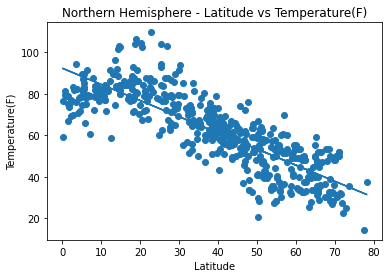

In [38]:
#NH - Temp vs Lat

x_latitude = np.asarray(northern_hemisphere_df["Latitude"])
y_temperature = np.asarray(northern_hemisphere_df["Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temperature)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_temperature)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title("Northern Hemisphere - Latitude vs Temperature(F)")
plt.savefig("./output_data/output_graphs/NH_lat_vs_temp.png")
plt.show()

#THERE APPEARS TO BE A NEGATIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE TEMPERATURE OF A CITY
#IN THE NORTHERN HEMISPHERE AS THE TEMPERATURE DECREASE THE FURTHER AWAY A CITY IS FROM LATITUDE = 0

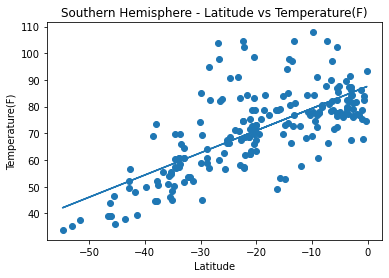

In [39]:
#SH - Temp vs Lat

x_latitude = np.asarray(southern_hemisphere_df["Latitude"])
y_temperature = np.asarray(southern_hemisphere_df["Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temperature)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_temperature)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title("Southern Hemisphere - Latitude vs Temperature(F)")
plt.savefig("./output_data/output_graphs/SH_lat_vs_temp.png")
plt.show()

#THERE APPEARS TO BE A POSITIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE TEMPERATURE OF A CITY
#IN THE SOUTHERN HEMISPHERE AS THE TEMPERATURE INCREASES THE CLOSER A CITY GETS TOWARDS LATITUDE = 0
#OVERALL WE CAN SAY THAT AS THE LATITUDE APPROACHES 0, THE TEMPERATURE INCREASES
#AND THE TEMPERATURE DECREASES AS LONG AS WE ARE MOVING AWAY FROM LATITUDE=0 (REGARDLESS OF POSITIVE/NEGATIVE DIRECTION) 

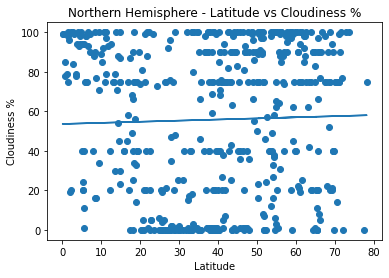

In [40]:
#NH - Cloudy vs Lat

x_latitude = np.asarray(northern_hemisphere_df["Latitude"])
y_cloudiness = np.asarray(northern_hemisphere_df["Cloudiness %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_cloudiness)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_cloudiness)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Northern Hemisphere - Latitude vs Cloudiness %")
plt.savefig("./output_data/output_graphs/NH_lat_vs_cloudiness.png")
plt.show()



#THERE APPEARS TO BE A POSTIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE CLOUDINESS OF A CITY
#IN THE NORTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT THAT DOES NOT APPEAR TO BE THE CASE
#BECAUSE THERE ARE VARIOUS VALUES OF CLOUDINESS FOR ALL LATITUDES SO A RELATIONSHIP CANNOT BE DETERMINED

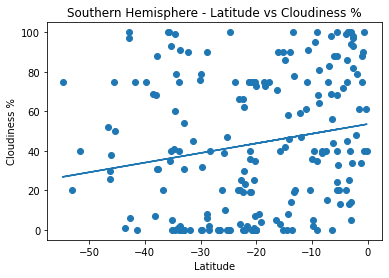

In [41]:
#SH - Cloudy vs Lat

x_latitude = np.asarray(southern_hemisphere_df["Latitude"])
y_cloudiness = np.asarray(southern_hemisphere_df["Cloudiness %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_cloudiness)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_cloudiness)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Southern Hemisphere - Latitude vs Cloudiness %")
plt.savefig("./output_data/output_graphs/SH_lat_vs_cloudiness.png")
plt.show()

#THERE APPEARS TO BE A POSTIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE CLOUDINESS OF A CITY
#IN THE SOUTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT THAT DOES NOT APPEAR TO BE THE CASE
#BECAUSE THERE ARE VARIOUS VALUES OF CLOUDINESS FOR ALL LATITUDES SO A RELATIONSHIP CANNOT BE DETERMINED

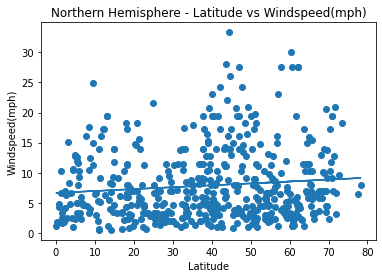

In [42]:
#NH - Wind vs Lat

x_latitude = np.asarray(northern_hemisphere_df["Latitude"])
y_windspeed = np.asarray(northern_hemisphere_df["Windspeed(mph)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_windspeed)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_windspeed)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed(mph)')
plt.title("Northern Hemisphere - Latitude vs Windspeed(mph)")
plt.savefig("./output_data/output_graphs/NH_lat_vs_windspeed.png")
plt.show()


#THERE APPEARS TO BE A SLIGHTLY POSTIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE WINDSPEED OF A CITY
#IN THE NORTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT IT IS EXTREMELY SUBTLE TO THE POINT WHERE YOU COULD
#SAY THERE IS NO REAL RELATIONSHIP

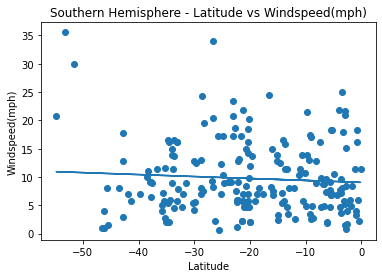

In [43]:
#SH - Wind vs Lat

x_latitude = np.asarray(southern_hemisphere_df["Latitude"])
y_windspeed = np.asarray(southern_hemisphere_df["Windspeed(mph)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_windspeed)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_windspeed)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed(mph)')
plt.title("Southern Hemisphere - Latitude vs Windspeed(mph)")
plt.savefig("./output_data/output_graphs/SH_lat_vs_windspeed.png")
plt.show()


#THERE APPEARS TO BE A SLIGHTLY NEGATIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE WINDSPEED OF A CITY
#IN THE NORTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT IT IS EXTREMELY SUBTLE TO THE POINT WHERE YOU COULD
#SAY THERE IS NO REAL RELATIONSHIP

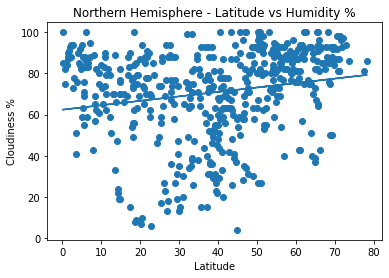

In [44]:
#NH - Humid vs Lat

x_latitude = np.asarray(northern_hemisphere_df["Latitude"])
y_humidity = np.asarray(northern_hemisphere_df["Humidity %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_humidity)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_humidity)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Northern Hemisphere - Latitude vs Humidity %")
plt.savefig("./output_data/output_graphs/NH_lat_vs_humidity.png")
plt.show()

#THERE APPEARS TO BE A SLIGHTLY POSTIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE HUMIDITY OF A CITY
#IN THE NORTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT IT IS EXTREMELY SUBTLE TO THE POINT WHERE YOU COULD
#SAY THERE IS NO REAL RELATIONSHIP

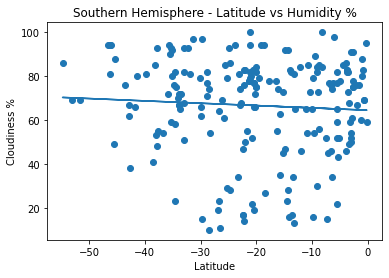

In [45]:
#SH - Humid vs Lat

x_latitude = np.asarray(southern_hemisphere_df["Latitude"])
y_humidity = np.asarray(southern_hemisphere_df["Humidity %"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_humidity)
regress_values = x_latitude * slope + intercept
plt.scatter(x_latitude, y_humidity)
plt.plot(x_latitude,regress_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Southern Hemisphere - Latitude vs Humidity %")
plt.savefig("./output_data/output_graphs/SH_lat_vs_humidity.png")
plt.show()


#THERE APPEARS TO BE A SLIGHTLY NEGATIVE RELATIONSHIP BETWEEN THE LATITUDE AND THE HUMIDITY OF A CITY
#IN THE SOUHTHERN HEMISPHERE BASED ON THE REGRESSION LINE BUT IT IS EXTREMELY SUBTLE TO THE POINT WHERE YOU COULD
#SAY THERE IS NO REAL RELATIONSHIP